<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
cd /content/drive/MyDrive/mashine learning classroom/linear regressing model/dataset


/content/drive/MyDrive/mashine learning classroom/linear regressing model/dataset


In [53]:
ls

cleanedMathData.csv  student-merge.R  univarit_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


In [54]:
import os


In [55]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [56]:
mathData = pd.read_csv('student-mat.csv', sep=';') #load the csv file as dataframe

In [57]:


mathData.head(10) #print the first ten rows of the dataframe



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


we are going to consider only `G1` and `g3`



In [58]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [59]:
uniMathData.to_csv('univarit_MathData_2.csv')

In [60]:
ls

cleanedMathData.csv  student-merge.R  univarit_MathData_2.csv
student-mat.csv      student-por.csv
student-mat.gsheet   student.txt


## data visualization


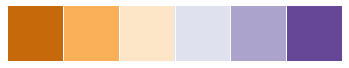

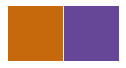

In [61]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [62]:
uniMathData.columns

Index(['G1', 'G3'], dtype='object')

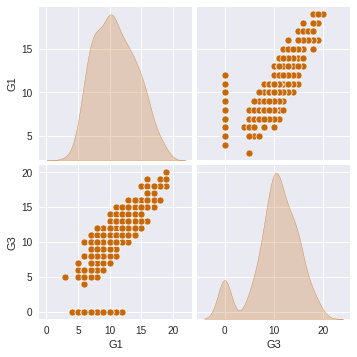

In [63]:
sns.pairplot(uniMathData,
             x_vars=['G1','G3'],
             y_vars=['G1','G3'],
             diag_kind='kde'
             )

##Data split

In [64]:
trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [65]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [66]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [67]:
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [68]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [69]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [70]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [76]:
numEpochs = 600
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/600
10/10 [==============================] - 0s 8ms/step - loss: 1.8929 - mae: 1.8929 - mse: 8.7629 - val_loss: 1.6348 - val_mae: 1.6348 - val_mse: 6.7224
Epoch 2/600
10/10 [==============================] - 0s 3ms/step - loss: 1.8928 - mae: 1.8928 - mse: 8.7663 - val_loss: 1.6368 - val_mae: 1.6368 - val_mse: 6.7300
Epoch 3/600
10/10 [==============================] - 0s 4ms/step - loss: 1.8928 - mae: 1.8928 - mse: 8.7697 - val_loss: 1.6357 - val_mae: 1.6357 - val_mse: 6.7250
Epoch 4/600
10/10 [==============================] - 0s 3ms/step - loss: 1.8925 - mae: 1.8925 - mse: 8.7648 - val_loss: 1.6348 - val_mae: 1.6348 - val_mse: 6.7208
Epoch 5/600
10/10 [==============================] - 0s 5ms/step - loss: 1.8926 - mae: 1.8926 - mse: 8.7634 - val_loss: 1.6349 - val_mae: 1.6349 - val_mse: 6.7209
Epoch 6/600
10/10 [==============================] - 0s 3ms/step - loss: 1.8926 - mae: 1.8926 - mse: 8.7601 - val_loss: 1.6345 - val_mae: 1.6345 - val_mse: 6.7188
Epoch 7/600
10/10 [===

In [77]:
print(history)

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


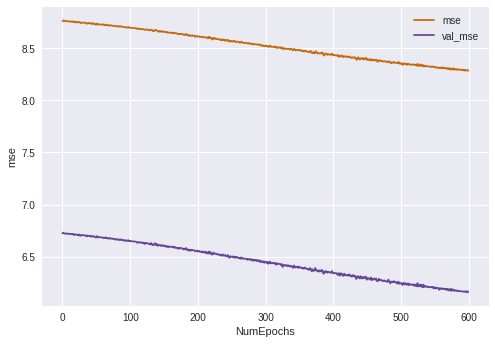

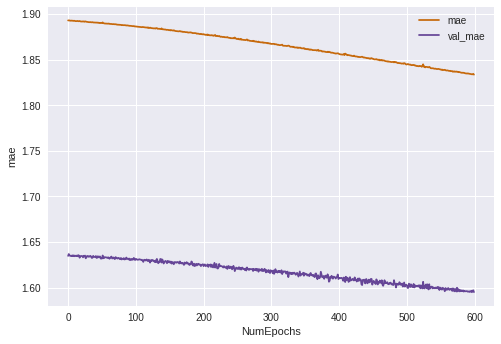

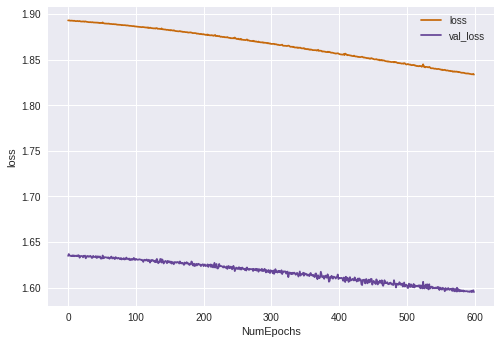

In [79]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [80]:
model.predict([1])

array([[1.0203218]], dtype=float32)

In [82]:
print(f'Prediction for input value 1: {model.predict([1])}')

tempListforPreds=[3,5,67,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.0203218]]


input List = [3, 5, 67, 5]


List of Predictions:
[[ 3.0160568]
 [ 5.011791 ]
 [66.87957  ]
 [ 5.011791 ]]

List of Predictions (flattened out):
[ 3.0160568  5.011791  66.87957    5.011791 ]



In [84]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [85]:
testPreds = model.predict(testFeatures).flatten()

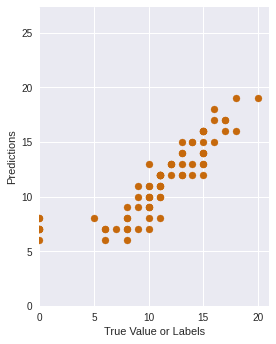

In [86]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

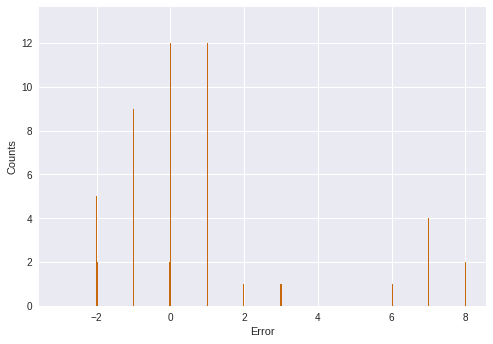

In [87]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)